In [84]:
! git clone https://github.com/DS3001/knn

fatal: destination path 'knn' already exists and is not an empty directory.


In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Question 1
Q1. This question is a case study for  nearest neighbor The target variable y is price and the features are year and mileage.

Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.
Maxmin normalize year and mileage.
Split the sample into ~80% for training and ~20% for evaluation.
Use the NN algorithm and the training data to predict price using year and mileage for the test set for k = 3, 10, 25, 50, 100, 300. For each value of k, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase k?
Determine the optimal k for these data.
Describe what happened in the plots of predicted versus actual prices as  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [86]:
df = pd.read_csv('./knn/data/USA_cars_datasets.csv') # loading the dataset

Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.

In [87]:
df = df.loc[:, ['price', 'year', 'mileage']]

In [88]:
print(df.head()) # head of the data looks good, and there is nothing missing. includes everything we want
print(df.shape) # 2499 rows by 3 columns
print(df.describe())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


No NAs to handle because the count from describe matches the dimensions of the data given in shape; the data looks good to proceed with

In [89]:
# Just to be safe, I'm gonna check each variable for weird stuff
print(df['mileage'].unique())
# okay I think it looks fine from what I can see

[274117 190552  39590 ...  34553  32557  31371]


In [90]:
print(df['price'].unique())
# everything is in the same format and numeric, so it looks chill

[ 6300  2899  5350 25000 27700  5700  7300 13350 14600  5250 10400 12920
 31900  5430 20700 12710  5200 16500  5210 38100 12520 15000  6180 20800
 11900 21500 12000  4190 13000 18500 29800  5330 16600 19200  7320  7000
 30500  6330 55000 16200 19000  5580 54000 16000 27000  7760 19600 20000
 18100 23000 13490 17800  6650 29100 21100 18600  4340 19300 12780 15800
 29400  4430 19400 15900 26400  4140 18300 17900  4640 24000 13200 18000
 14900 11500  9110  7350 24500  9300 39800 53500 15110 34000 26502  5990
 13600 23605 10780 13800 25201  7070  8700 18003  8530 23100 17000 34002
  6980 20802  9200 26500 24802 28500 47500 23500 23505 10940 32100 53000
  6830 26414  4160 19405  5690 25900 24005  5090 19500 32012  6800  4260
     0 31802  7210 28402 33300  6700  6440 19900 37000  4040 22300 31200
  4290 22800 19002 39000  6060 28800 40000  6140 21000 20105  6760 25800
  5470 24502  7900 27305 15290 25502  3800  1400 18402   175 24503 15840
 20500 21003  4200 17400 32001 15700 31009  3740  5

In [91]:
print(df['year'].unique())
# also good

[2008 2011 2018 2014 2010 2017 2009 2013 2015 2020 2016 1973 2003 2019
 2002 2000 2001 2005 2012 2006 2007 1998 2004 1994 1997 1996 1999 1984
 1995 1993]


In [92]:
df.head() # just checking that i isolated the variables

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [93]:
# using this function from the kNN notes in order to maxmin normalize year and mileage
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [94]:
X = df.loc[:,['year', 'mileage']] # Create feature matrix
X = X.apply(maxmin) # Normalize X
y = df['price'] # Create target variable vector
print(df.head())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


The purpose of maxmin normalizing year and mileage was to bring all the values of year and mileage on the same-ish scale to make comparison easier. According to the kNN notes, "We often scale or normalize variables to reduce the extent to which their relative values change the performance of the model", which is just a nicer way of saying what I said.

Now I have to split the sample into ~80% for training and ~20% for evaluation.

In [95]:
# Split the sample into 20% for evaluation and 80% for training:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
print(y_test.shape) # printing the y shapes was silly, but I was wondering how it would differ from the X shapes; it looks like it's just missing the other part of the dimension
print(y_train.shape)
print(X_test.shape)
print(X_train.shape)

(500,)
(1999,)
(500, 2)
(1999, 2)


126446573.21822222


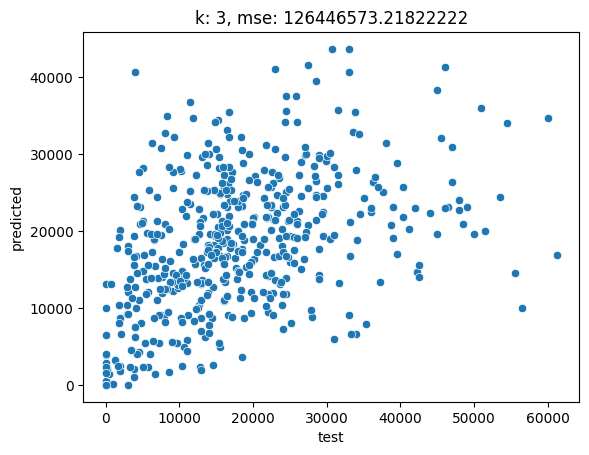

110802185.58681999


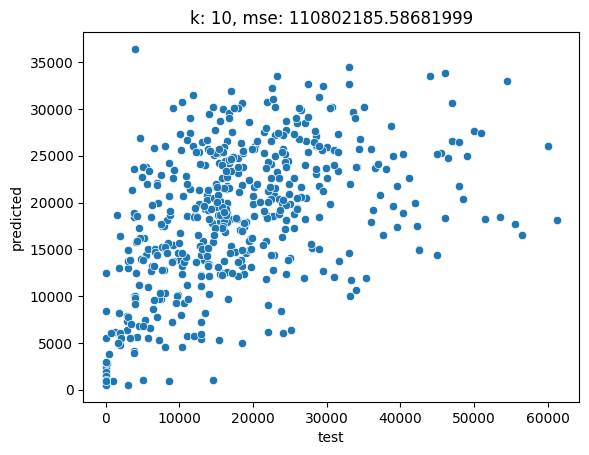

103170457.848608


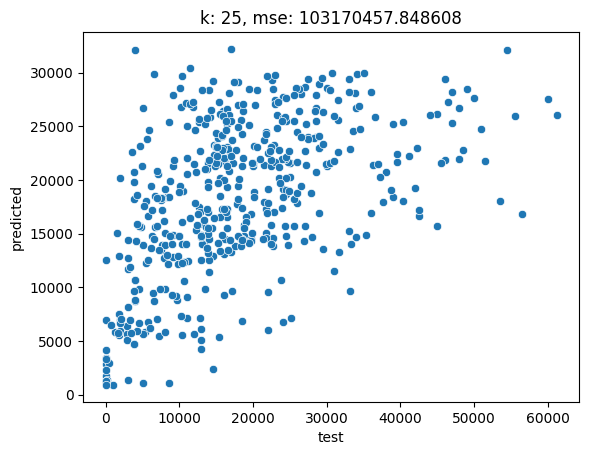

99695443.96419598


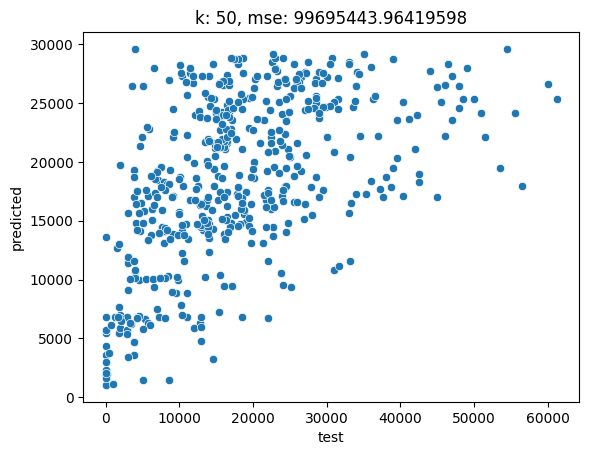

98271058.96092059


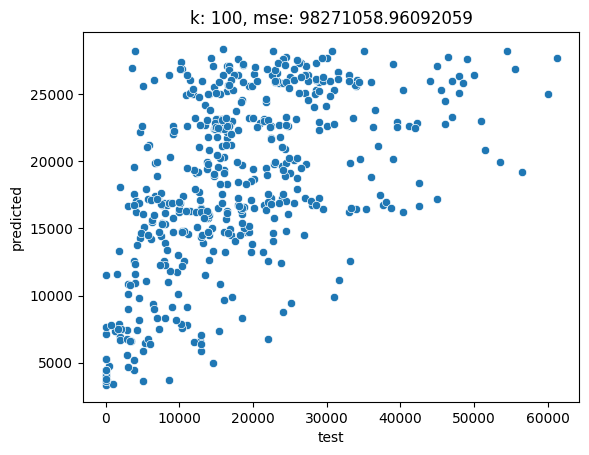

100477298.914212


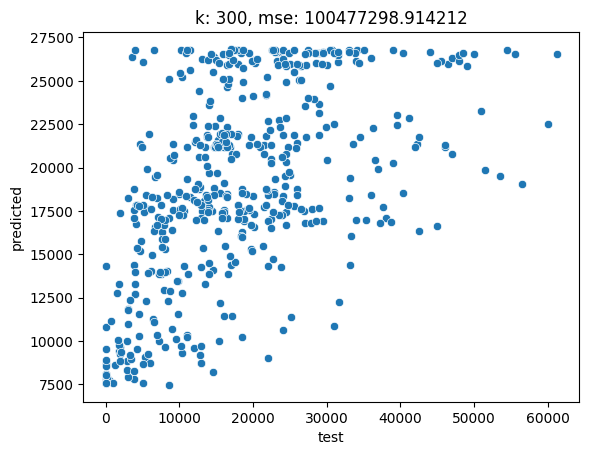

In [96]:
k_values = 3, 10, 25, 50, 100, 300 # the k values given to test in the question
for k in k_values: # making a for loop to create plots that calculate mean squared error for each of the k values
  knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
  y_hat = knn_model.predict(X_test)
  mse = mean_squared_error(y_test, y_hat)
  print(mse) # outputs the calculated mean squared error
  plt.title('k: '+str(k)+', mse: '+str(mse))
  graph_data = pd.DataFrame({"test": y_test, "predicted": y_hat})
  sns.scatterplot(data=graph_data, x = "test", y = "predicted")
  plt.show()

I noticed that as k increases, the points of the scatterplot become more packed in, and the mean squared error gets larger. Mean squared erorr tells you how close a line of regression is to the points of data. A larger mean squared error means that the error is getting higher. The lower k values have a lower MSE, meaning that k=3 has the best MSE.

Optimal K value:  [77]


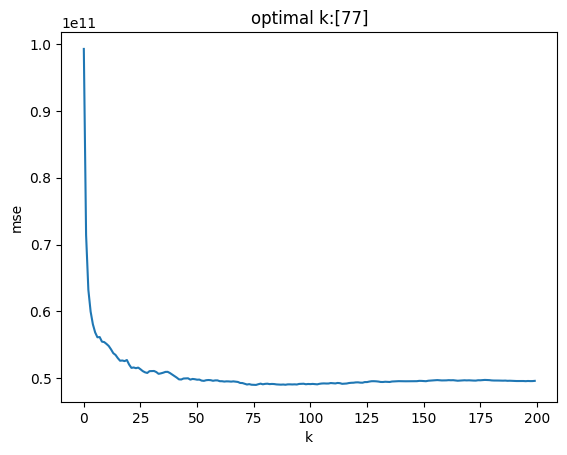

In [97]:
# now i am going to find the optimal k value for this data
k_bar = 200
k_grid = np.arange(1,k_bar) # The range of k's to consider
mse = np.zeros(k_bar)
for k in range(k_bar):
  fitted = kNNRegression(n_neighbors=k+1).fit(X_train,y_train)
  y_hat = fitted.predict(X_test) # predicting values based on the data
  mse[k] = np.sum( (y_test-y_hat)**2 ) # storing the mean squared error
mse_min = np.min(mse)
min_index = np.where(mse==mse_min)
k_star = k_grid[min_index] # finding the optimal k
print("Optimal K value: ", k_star)
plt.plot(np.arange(0,k_bar),mse) # Plot mse by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('mse')
plt.show()

Describe what happened in the plots of predicted versus actual prices as  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

My work found that the optimal k is 77, so the k values of 3,10,25,50 are underfitting, while the k values of 100 and 300 are overfitting. Because of their proximity to 77, 50 and 100 probably fit the best. After some research, I found that too high of a k means the model is trying too hard to fit the data, resulting in overfitting. The model seems to get smaller as k increases, and there's not much difference in the line after the optimal value of k passes. It just seems to average out. In my predicted versus actual prices plots, k=300 seems to just group together at the top, as opposed to 3 which is more varied.

 This question is a case study for  nearest neighbor. The data for the question include:

age: age of the patient (years)
anaemia: decrease of red blood cells or hemoglobin (boolean)
high blood pressure: if the patient has hypertension (boolean)
creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
diabetes: if the patient has diabetes (boolean)
ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
platelets: platelets in the blood (kiloplatelets/mL)
sex: woman or man (binary)
serum creatinine: level of serum creatinine in the blood (mg/dL)
serum sodium: level of serum sodium in the blood (mEq/L)
smoking: if the patient smokes or not (boolean)
time: follow-up period (days)
death event: if the patient deceased during the follow-up period (boolean)
Load the ./data/heart_failure_clinical_records_dataset.csv. Are there any NA's to handle? use .drop() to remove time from the dataframe.
Make a correlation matrix. What variables are strongly associated with a death event?
For the dummy variables anaemia, diabetes, high_blood_pressure, sex, and smoking, compute a summary table of DEATH_EVENT grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
On the basis of your answers from 2 and 3, build a matrix  of the variables you think are most predictive of a death, and a variable  equal to DEATH_EVENT.
Maxmin normalize all of the variables in X.
Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
Determine the optimal number of neighbors for a NN regression for the variables you selected.
OK, do steps 5 through 7 again, but use all of the variables (except time). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict DEATH_EVENTs? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [98]:
import pandas as pd
import numpy as np

sdf = pd.read_csv('./knn/data/heart_failure_clinical_records_dataset.csv') # loading the dataset
# chose sdf because I used df for the other question

In [99]:
sdf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [100]:
sdf.shape

(299, 13)

No missing values because there are 299 observations and the count for each variable is 299.

In [101]:
sdf = sdf.drop('time', axis = 1) # using .drop to get rid of the time variable

I dropped the time variable using .drop. I tried to do it without axis=1 and it failed.

In [102]:
sdf.describe() # checking that time is removed

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


Make a correlation matrix. What variables are strongly associated with a death event?

In [103]:
sdf.corr() # easy correlation method

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


DEATH_EVENT has the strongest correlations with ejection_fraction(-0.2686), serum_creatinine (0.2943), and age (0.2537).

For the dummy variables anaemia, diabetes, high_blood_pressure, sex, and smoking, compute a summary table of DEATH_EVENT grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

In [115]:
# i commented out the stuff that i tried that did not work*****
variables = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'] # making a list of the dummy variables to compute a summary table
# make_sum_table = sdf.groupby(variables)['DEATH_EVENT'].describe()
# print(make_sum_table)

# anaemia_group = sdf['variables' + ['DEATH_EVENT']].groupby('anaemia').describe()
# print(anaemia_group)

for variable in variables: # for loop that accesses the data in each variable I chose and puts them in a table and gives a 5 number summary and some other stuff
  sum_table = sdf.loc[:,[variable,'DEATH_EVENT']].groupby(variable).describe()
  print(sum_table)

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

For the variables high_blood_pressure and anaemia, there is a higher proportion of individuals that died when the value was 1 (1 is presumably yes-they have that condition). I'd say these two would be pretty good at predicting a death event, but other variables, like smoking (surprisingly), sex, or diabetes (also surprisingly) seem less predictive of a death event.

On the basis of your answers from 2 and 3, build a matrix X of the variables you think are most predictive of a death, and a variable y equal to DEATH_EVENT.

In [105]:
y = sdf['DEATH_EVENT'] # making variable, y, equal to death event like the question said
choosing_these = ['age','anaemia','serum_creatinine','high_blood_pressure'] # making matrix X of variables that I chose to predict death events
X = sdf.loc[:,choosing_these] # using .loc to access groups of rows/columns and put them into the X matrix

Maxmin normalize all of the variables in X.

In [106]:
# reusing code from the other question
# function calculates maxmin, which scales the data
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
X = X.apply(maxmin)

Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [107]:
np.random.seed(100) # ensures the random process of splitting the data is consistent across the code
# good for making easily comparable data
N = X.shape[0] # X.shape is the dimensions of the X matrix, and the indexing gets the number of rows
all = np.arange(N)
train = np.random.choice(N,int(.8*N)) # 80, 20 splitting N (all the samples)
test = np.setdiff1d(all, train) # had to look this one up, but it's pretty useful for finding the difference between 2 arrays (all and train)
# https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html#
X_train = X.iloc[train,:] # integer based indexing for each train and test
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

Determine the optimal number of neighbors for a kNN regression for the variables you selected.

Optimal K value:  [12]


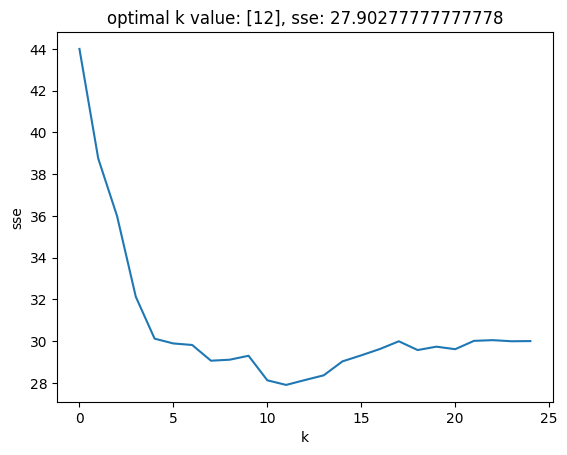

In [108]:
# again recycling more code from the previous question
k_bar = 25
k_grid = np.arange(1,k_bar) # The range of k's to consider
sse = np.zeros(k_bar)
for k in range(k_bar):
  fitted = kNNRegression(n_neighbors=k+1).fit(X_train,y_train)
  y_hat = fitted.predict(X_test) # predicting values based on the data
  sse[k] = np.sum( (y_test-y_hat)**2 ) # storing the sum squared error
sse_min = np.min(sse)
min_index = np.where(sse==sse_min)
k_star = k_grid[min_index] # finding the optimal k
print("Optimal K value: ", k_star)
plt.plot(np.arange(0,k_bar),sse) # Plot sse by k
plt.xlabel("k")
plt.title('optimal k value: '+str(k_star)+', sse: '+str(sse_min))
plt.ylabel('sse')
plt.show()

The optimal k value is 12 with a sse of 27.9. This isn't a bad sse, especially since it is a little lower than my next plot.

OK, do steps 5 through 7 again, but use all of the variables (except time). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict DEATH_EVENTs? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [109]:
X = sdf.drop('DEATH_EVENT', axis = 1) # dropping DEATH_EVENT from the matrix
print(X) # checking that I actually dropped it successfully

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [110]:
# reusing this code
np.random.seed(100)
N = X.shape[0]
all = np.arange(N)
train = np.random.choice(N,int(.8*N))
test = np.setdiff1d(all, train) # had to look this one up, but it's pretty useful for finding the difference between 2 arrays (all and train)
# https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html#
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

Optimal K value:  [83]


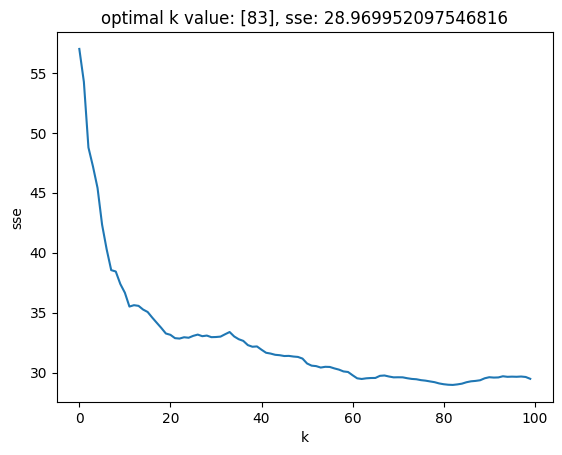

In [111]:
# reusing this too
k_bar = 100
k_grid = np.arange(1,k_bar) # The range of k's to consider
sse = np.zeros(k_bar)
for k in range(k_bar):
  fitted = kNNRegression(n_neighbors=k+1).fit(X_train,y_train)
  y_hat = fitted.predict(X_test) # predicting values based on the data
  sse[k] = np.sum( (y_test-y_hat)**2 ) # storing the sum squared error
sse_min = np.min(sse)
min_index = np.where(sse==sse_min)
k_star = k_grid[min_index] # finding the optimal k
print("Optimal K value: ", k_star)
plt.plot(np.arange(0,k_bar),sse) # Plot mse by k
plt.xlabel("k")
plt.title('optimal k value: '+str(k_star)+', sse: '+str(sse_min))
plt.ylabel('sse')
plt.show()

My first model had a lower sum of squared error, but only by a teeny margin of 0.02. This means that although the difference is so small, my first model fits the data better, as the predicted values are closer to the actual values. Because of this, I would prefer to use my first model in practice, as it is likely to be more accurate to predict death events. It looks like less variables are better in terms of accurate predictions. Also, SSE seems to go up with more variables.